# Analyzing Austin PD's Crime Reports Dataset

I downloaded the latest copy of the dataset from https://data.austintexas.gov on 7/27/2020. 

A point of note: I originally attempted importing data into the notebook using the Sodapy/Socrata method but found it lacking. I therefore preferred to download the entire dataset and re-download it whenever it's updated. 

In [1]:
# Importing libraries and configurations
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)


# Loading and examining dataset 
df = pd.read_csv('datasets\crime_reports.csv', parse_dates=['Report Date Time'], index_col=['Report Date Time'])

display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())
print('----------------------------------')
display(df.isnull().sum())

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Report Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-27 00:28:00,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,10/27/2018,28.0,PARKING LOTS / GARAGE,2201 MONTOPLOIS DR,NaN,NaN,NaN,NaN,NaN,NaN,N,10/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-18 19:09:00,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,05/18/2014,1909.0,RESIDENCE / HOME,12836 BUENOS ARIES PKWY,NaN,NaN,NaN,NaN,NaN,NaN,N,05/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-09 21:08:00,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008,2108.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-16 00:22:00,20161971680,DWI,2100,N,07/15/2016 10:15:00 PM,07/15/2016,2215.0,07/16/2016,22.0,STREETS / HWY / ROAD / ALLEY,6000 BLK OF BOLM RD,NaN,NaN,NaN,NaN,NaN,NaN,C,01/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-28 12:15:00,20135029070,PROTECTIVE ORDER,3829,N,06/28/2013 12:15:00 PM,06/28/2013,1215.0,06/28/2013,1215.0,RESIDENCE / HOME,COHISE COUNTY AZ,NaN,NaN,NaN,NaN,NaN,NaN,N,06/28/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Report Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-23 10:31:00,20175007735,HARASSMENT,2703,N,01/31/2017 10:31:00 AM,01/31/2017,1031.0,02/23/2017,1031.0,RESIDENCE / HOME,9802 ROXANNA DR,78748.0,5.0,FR,1,535,17.47,N,03/16/2017,NaN,NaN,3088221.0,3088221.0,30.176236,-97.827862,"(30.17623555, -97.82786218)"
2010-03-29 07:17:00,20108800371,CRIMINAL TRESPASS/TRANSIENT,2721,N,03/29/2010 07:17:00 AM,03/29/2010,717.0,03/29/2010,717.0,CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,203 E 10TH ST,78701.0,9.0,GE,1,379,11.00,N,03/30/2010,NaN,NaN,3115283.0,3115283.0,30.271040,-97.739653,"(30.27103998, -97.73965326)"
2003-01-05 10:31:00,2003924076801,BURGLARY OF RESIDENCE,500,N,01/04/2003 06:30:00 PM,01/04/2003,1830.0,01/05/2003,1031.0,RESIDENCE / HOME,1809 SANCHEZ ST,78702.0,1.0,CH,3,394,8.00,N,NaN,220,Burglary,3125587.0,3125587.0,30.281489,-97.706719,"(30.28148881, -97.70671938)"
2006-03-31 22:46:00,2006902409,BURGLARY NON RESIDENCE,502,N,03/31/2006 10:46:00 PM,03/31/2006,2246.0,03/31/2006,2246.0,COMMERCIAL / OFFICE BUILDING,6016 OLD FREDERICKSBURG RD,78749.0,8.0,DA,6,78,NaN,NaN,05/10/2006,220,Burglary,3081299.0,3081299.0,30.234197,-97.848283,"(30.2341966, -97.8482829)"
2010-01-24 00:14:00,2010232299,FAMILY DISTURBANCE,3400,N,01/23/2010 10:44:00 PM,01/23/2010,2244.0,01/24/2010,14.0,RESIDENCE / HOME,9307 GEORGIAN DR,78753.0,4.0,ED,1,250,18.00,N,02/06/2010,NaN,NaN,3129098.0,3129098.0,30.360317,-97.693437,"(30.36031662, -97.69343723)"


----------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2253886 entries, 2018-10-27 00:28:00 to 2010-01-24 00:14:00
Data columns (total 26 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate      

None

----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date                          0
Report Time                          1
Location Type                    20850
Address                             12
Zip Code                         13684
Council District                 46716
APD Sector                        8682
APD District                      9150
PRA                              10368
Census Tract                   1292062
Clearance Status                601537
Clearance Date                  332324
UCR Category                   1489020
Category Description           1489020
X-coordinate                      9784
Y-coordinate                      9784
Latitude                         37956
Longitude                        37956
Location                 

## Data Scrubbing

In [2]:
# Cleaning essential columns and converting them to the appropriate data type
df.dropna(subset=['Address'], inplace=True)
df.dropna(subset=['Zip Code'], inplace=True)
df['Occurred Date Time'] = df['Occurred Date Time'].astype('datetime64')

# Sorting and showing the index 
df.sort_index(inplace=True)
display(df.index)

# Reexamining the dataset
print('----------------------------------')
display(df.isnull().sum())
print('----------------------------------')
display(df.describe())

DatetimeIndex(['2002-11-29 05:30:00', '2003-01-01 00:01:00',
               '2003-01-01 00:02:00', '2003-01-01 00:03:00',
               '2003-01-01 00:06:00', '2003-01-01 00:08:00',
               '2003-01-01 00:10:00', '2003-01-01 00:11:00',
               '2003-01-01 00:11:00', '2003-01-01 00:12:00',
               ...
               '2020-07-25 19:34:00', '2020-07-25 19:47:00',
               '2020-07-25 19:50:00', '2020-07-25 20:21:00',
               '2020-07-25 20:30:00', '2020-07-25 20:40:00',
               '2020-07-25 21:04:00', '2020-07-25 21:40:00',
               '2020-07-26 00:48:00',                 'NaT'],
              dtype='datetime64[ns]', name='Report Date Time', length=2240202, freq=None)

----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 152
Occurred Date                        0
Occurred Time                       71
Report Date                          0
Report Time                          1
Location Type                    20456
Address                              0
Zip Code                             0
Council District                 33032
APD Sector                           8
APD District                        11
PRA                                 11
Census Tract                   1279237
Clearance Status                597135
Clearance Date                  329194
UCR Category                   1477575
Category Description           1477575
X-coordinate                         7
Y-coordinate                         7
Latitude                         27431
Longitude                        27431
Location                 

----------------------------------


,Incident Number,Highest Offense Code,Occurred Time,Report Time,Zip Code,Council District,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude
count,2.240202e+06,2.240202e+06,2.240131e+06,2.240201e+06,2.240202e+06,2.207170e+06,960965.000000,2.240195e+06,2.240195e+06,2.212771e+06,2.212771e+06
mean,6.824376e+10,1.767743e+03,1.326673e+03,1.324628e+03,7.872995e+04,4.938234e+00,167.493524,3.078575e+06,3.078575e+06,3.028957e+01,-9.773456e+01
std,3.146716e+11,1.195840e+03,7.210503e+02,6.698885e+02,4.149510e+02,2.849548e+00,5436.383606,3.438600e+05,3.438600e+05,7.696337e-02,8.051813e-02
min,2.003500e+04,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.204500e-04,-9.819029e+01
25%,2.005160e+10,6.010000e+02,8.060000e+02,9.000000e+02,7.870500e+04,3.000000e+00,17.120000,3.108750e+06,3.108750e+06,3.023259e+01,-9.775843e+01
50%,2.009504e+10,1.400000e+03,1.432000e+03,1.407000e+03,7.874100e+04,4.000000e+00,18.320000,3.117218e+06,3.117218e+06,3.027348e+01,-9.773243e+01
75%,2.014503e+10,2.721000e+03,1.935000e+03,1.900000e+03,7.875200e+04,7.000000e+00,23.120000,3.126410e+06,3.126410e+06,3.034670e+01,-9.770253e+01
max,2.020202e+12,8.905000e+03,2.400000e+03,2.359000e+03,7.875900e+04,1.000000e+01,950800.000000,3.889524e+07,3.889524e+07,3.066885e+01,-1.335600e-04


## Exploratory Analysis

### Question 1. What areas of Austin have the highest crime rates? 

***For the purposes of making visualizations easier and to save space, I am only including zip codes where the percentage of crime is over 1%. Any zip code with a crime rate of less than 1%, I am excluding from the following dataframes***

In [3]:
# Create and show dataframe for crime rates by zipcode, then show as percentages
zip_codes = df['Zip Code'].value_counts().head(24)
display(zip_codes)
print('----------------------------------')
display(df['Zip Code'].value_counts(normalize=True).head(24))

78741.0    203101
78753.0    174656
78701.0    166375
78758.0    155416
78704.0    151709
78745.0    147774
78702.0    134836
78744.0    123647
78723.0    115928
78752.0     83016
78748.0     66397
78759.0     64692
78751.0     62820
78757.0     56510
78705.0     55884
78721.0     46835
78749.0     39633
78724.0     36883
78727.0     35047
78703.0     34538
78731.0     27886
78746.0     27695
78729.0     24935
78750.0     23021
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.090662
78753.0    0.077964
78701.0    0.074268
78758.0    0.069376
78704.0    0.067721
78745.0    0.065965
78702.0    0.060189
78744.0    0.055195
78723.0    0.051749
78752.0    0.037057
78748.0    0.029639
78759.0    0.028878
78751.0    0.028042
78757.0    0.025225
78705.0    0.024946
78721.0    0.020907
78749.0    0.017692
78724.0    0.016464
78727.0    0.015645
78703.0    0.015417
78731.0    0.012448
78746.0    0.012363
78729.0    0.011131
78750.0    0.010276
Name: Zip Code, dtype: float64

Text(0.5, 1.0, 'Top Crime Affected Zip Codes in Austin')

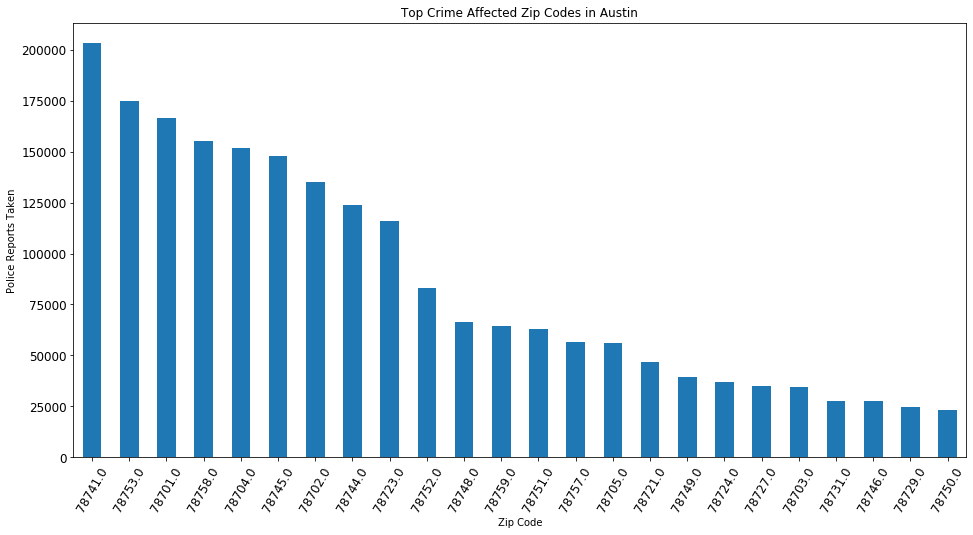

In [4]:
zip_codes.plot.bar(figsize=(16,8), fontsize=12, rot=60)

plt.xlabel('Zip Code')
plt.ylabel('Police Reports Taken')
plt.title('Top Crime Affected Zip Codes in Austin')

78741 has the highest amount of crime (9.07%) by 1.29 percentage points above 78753 which comes in second (7.79%). The next major decrease occurs between 78723 (5.18%) & 78752 (3.71%) with 1.47 percentage points. 

#### Examining particular zip codes more closely. 

Because 78753 is th zipcode where I live, and because it has the 2nd highest rate of crime, I am choosing to examine it first. 

Next, I'll examine 78741. 

In [5]:
# Examining crime in the 78753 area
df_53 = df[df['Zip Code'] == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53['Highest Offense Description'].value_counts().head(22)

# Display the different crime values & then as percentages 
display(df_53_off)
print('----------------------------------')
display(df_53['Highest Offense Description'].value_counts(normalize=True).head(22))

THEFT                             16857
BURGLARY OF VEHICLE               15652
FAMILY DISTURBANCE                14222
CRIMINAL MISCHIEF                  9176
THEFT BY SHOPLIFTING               7463
ASSAULT W/INJURY-FAM/DATE VIOL     6994
BURGLARY OF RESIDENCE              5980
DWI                                4814
DISTURBANCE - OTHER                4657
CUSTODY ARREST TRAFFIC WARR        4312
HARASSMENT                         4125
AUTO THEFT                         4012
POSS OF DRUG PARAPHERNALIA         3703
PUBLIC INTOXICATION                3337
ASSAULT WITH INJURY                3206
CRIMINAL TRESPASS                  3089
POSS CONTROLLED SUB/NARCOTIC       2923
RUNAWAY CHILD                      2878
WARRANT ARREST NON TRAFFIC         2778
POSSESSION OF MARIJUANA            2673
BURGLARY NON RESIDENCE             2426
VIOL CITY ORDINANCE - OTHER        1860
Name: Highest Offense Description, dtype: int64

----------------------------------


THEFT                             0.096515
BURGLARY OF VEHICLE               0.089616
FAMILY DISTURBANCE                0.081429
CRIMINAL MISCHIEF                 0.052538
THEFT BY SHOPLIFTING              0.042730
ASSAULT W/INJURY-FAM/DATE VIOL    0.040044
BURGLARY OF RESIDENCE             0.034239
DWI                               0.027563
DISTURBANCE - OTHER               0.026664
CUSTODY ARREST TRAFFIC WARR       0.024689
HARASSMENT                        0.023618
AUTO THEFT                        0.022971
POSS OF DRUG PARAPHERNALIA        0.021202
PUBLIC INTOXICATION               0.019106
ASSAULT WITH INJURY               0.018356
CRIMINAL TRESPASS                 0.017686
POSS CONTROLLED SUB/NARCOTIC      0.016736
RUNAWAY CHILD                     0.016478
WARRANT ARREST NON TRAFFIC        0.015906
POSSESSION OF MARIJUANA           0.015304
BURGLARY NON RESIDENCE            0.013890
VIOL CITY ORDINANCE - OTHER       0.010650
Name: Highest Offense Description, dtype: float64

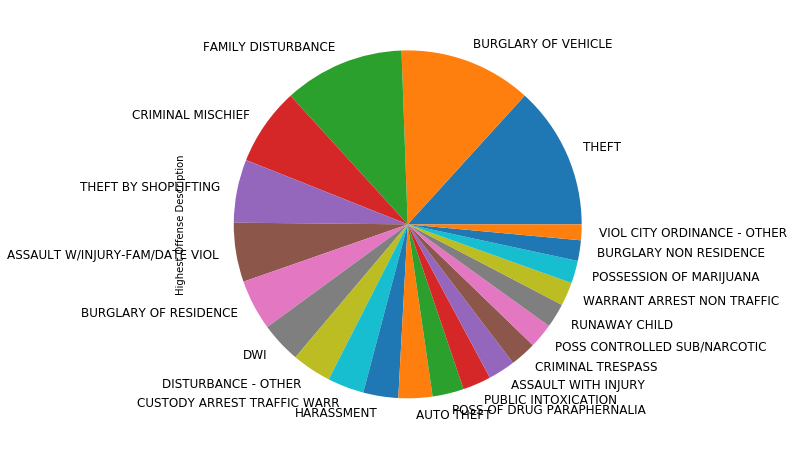

In [6]:
df_53_off.plot.pie(figsize=(8,8), fontsize=12)

In [7]:
# Create a dataframe for crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df['Zip Code'] == 78741]

# Create a dataframe for the top 10 crime categories in the zipcode
df_41_off = df_41['Highest Offense Description'].value_counts().head(21)

# Display the different crime values & then as percentages 
display(df_41_off)
print('----------------------------------')
display(df_41['Highest Offense Description'].value_counts(normalize=True).head(21))

FAMILY DISTURBANCE                19886
BURGLARY OF VEHICLE               19549
THEFT                             15341
CRIMINAL MISCHIEF                 10837
ASSAULT W/INJURY-FAM/DATE VIOL     9515
BURGLARY OF RESIDENCE              8760
PUBLIC INTOXICATION                6351
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5598
HARASSMENT                         5395
DISTURBANCE - OTHER                5070
ASSAULT WITH INJURY                4456
AUTO THEFT                         4446
POSS CONTROLLED SUB/NARCOTIC       3813
CRIMINAL TRESPASS                  3810
POSSESSION OF MARIJUANA            3778
THEFT BY SHOPLIFTING               3538
POSS OF DRUG PARAPHERNALIA         3512
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2766
VIOL CITY ORDINANCE - OTHER        2195
Name: Highest Offense Description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.097912
BURGLARY OF VEHICLE               0.096253
THEFT                             0.075534
CRIMINAL MISCHIEF                 0.053358
ASSAULT W/INJURY-FAM/DATE VIOL    0.046849
BURGLARY OF RESIDENCE             0.043131
PUBLIC INTOXICATION               0.031270
CUSTODY ARREST TRAFFIC WARR       0.029596
DWI                               0.027563
HARASSMENT                        0.026563
DISTURBANCE - OTHER               0.024963
ASSAULT WITH INJURY               0.021940
AUTO THEFT                        0.021891
POSS CONTROLLED SUB/NARCOTIC      0.018774
CRIMINAL TRESPASS                 0.018759
POSSESSION OF MARIJUANA           0.018602
THEFT BY SHOPLIFTING              0.017420
POSS OF DRUG PARAPHERNALIA        0.017292
WARRANT ARREST NON TRAFFIC        0.016977
RUNAWAY CHILD                     0.013619
VIOL CITY ORDINANCE - OTHER       0.010807
Name: Highest Offense Description, dtype: float64

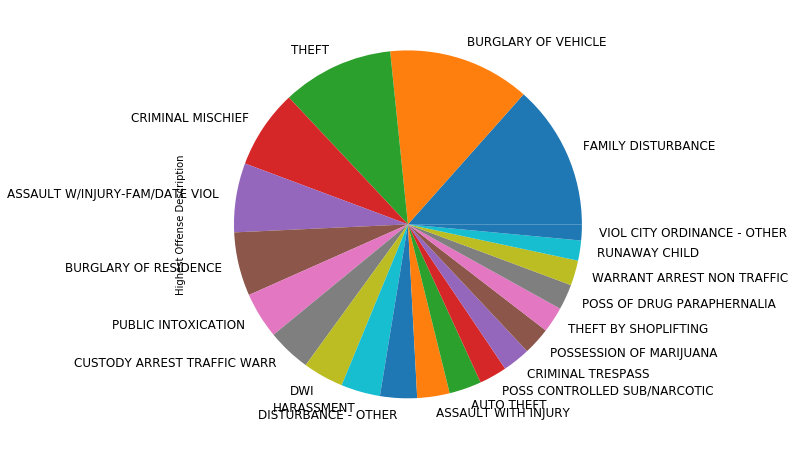

In [8]:
df_41_off.plot.pie(figsize=(8,8), fontsize=12)

### Question 2. How are violent crimes, in particular murder and rape, distributed? 

The difference between murder and capital murder means simply that in capital murder cases the perpetrator is automatically eligible for the death sentence in Texas. 

----------------------------------
Murder
----------------------------------


78741.0    42
78753.0    40
78758.0    36
78723.0    33
78744.0    27
78702.0    24
78752.0    21
78745.0    20
78704.0    16
78701.0    15
78721.0    13
78724.0    12
78749.0    10
78751.0     8
78757.0     6
78759.0     6
78617.0     6
78705.0     6
78754.0     5
78727.0     5
78731.0     4
78748.0     4
78747.0     4
78750.0     4
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.109375
78753.0    0.104167
78758.0    0.093750
78723.0    0.085938
78744.0    0.070312
78702.0    0.062500
78752.0    0.054688
78745.0    0.052083
78704.0    0.041667
78701.0    0.039062
78721.0    0.033854
78724.0    0.031250
78749.0    0.026042
78751.0    0.020833
78757.0    0.015625
78759.0    0.015625
78617.0    0.015625
78705.0    0.015625
78754.0    0.013021
78727.0    0.013021
78731.0    0.010417
78748.0    0.010417
78747.0    0.010417
78750.0    0.010417
Name: Zip Code, dtype: float64

----------------------------------
Capital Murder
----------------------------------


78723.0    11
78753.0    11
78758.0     7
78741.0     7
78745.0     6
78752.0     6
78744.0     4
78748.0     3
78721.0     3
78702.0     3
78704.0     2
78757.0     2
78705.0     2
78727.0     2
78724.0     2
78722.0     1
78703.0     1
78759.0     1
78749.0     1
78731.0     1
78701.0     1
78754.0     1
Name: Zip Code, dtype: int64

----------------------------------


78723.0    0.141026
78753.0    0.141026
78758.0    0.089744
78741.0    0.089744
78745.0    0.076923
78752.0    0.076923
78744.0    0.051282
78748.0    0.038462
78721.0    0.038462
78702.0    0.038462
78704.0    0.025641
78757.0    0.025641
78705.0    0.025641
78727.0    0.025641
78724.0    0.025641
78722.0    0.012821
78703.0    0.012821
78759.0    0.012821
78749.0    0.012821
78731.0    0.012821
78701.0    0.012821
78754.0    0.012821
Name: Zip Code, dtype: float64

----------------------------------
Rape
----------------------------------


78741.0    497
78753.0    355
78701.0    351
78758.0    310
78745.0    273
78704.0    240
78705.0    205
78744.0    203
78723.0    195
78702.0    181
78752.0    140
78748.0    112
78751.0    110
78759.0    103
78757.0     81
78721.0     73
78724.0     64
78729.0     55
78749.0     53
78731.0     52
78754.0     47
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.120983
78753.0    0.086417
78701.0    0.085443
78758.0    0.075463
78745.0    0.066456
78704.0    0.058423
78705.0    0.049903
78744.0    0.049416
78723.0    0.047468
78702.0    0.044060
78752.0    0.034080
78748.0    0.027264
78751.0    0.026777
78759.0    0.025073
78757.0    0.019718
78721.0    0.017770
78724.0    0.015579
78729.0    0.013389
78749.0    0.012902
78731.0    0.012658
78754.0    0.011441
Name: Zip Code, dtype: float64

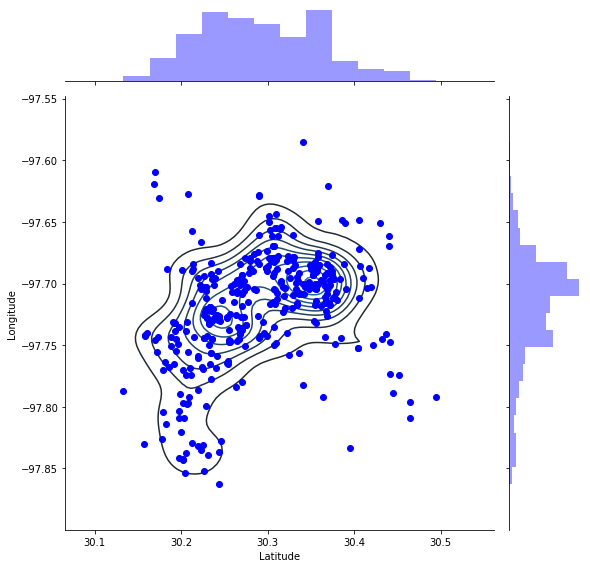

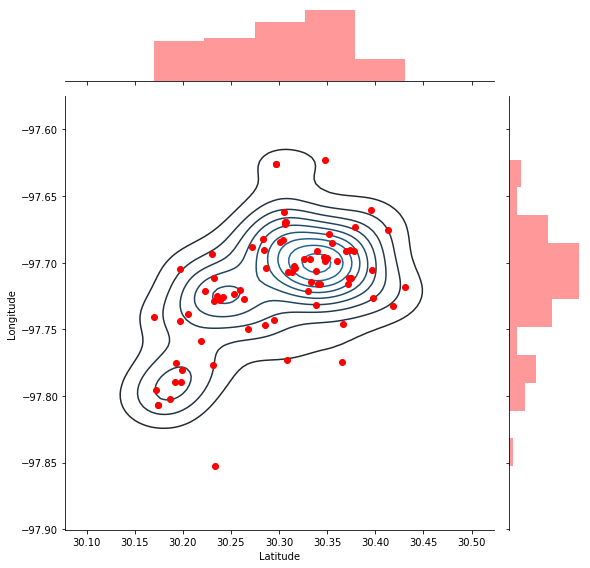

In [9]:
# Create a dataframe for murders, capital murders, and rapes
df_mur = df[df['Highest Offense Description'] == 'MURDER']
df_mur_cap = df[df['Highest Offense Description'] == 'CAPITAL MURDER']
df_rape = df[df['Highest Offense Description'] == 'RAPE']

# What are the top zipcodes for murders? 
print('----------------------------------')
print('Murder')
print('----------------------------------')
df_mur_val = df_mur['Zip Code'].value_counts().head(24)
display(df_mur_val)
print('----------------------------------')
display(df_mur['Zip Code'].value_counts(normalize=True).head(24))

# What are the top 10 zipcodes for capital murders? 
print('----------------------------------')
print('Capital Murder')
print('----------------------------------')
df_mur_cap_val = df_mur_cap['Zip Code'].value_counts()
display(df_mur_cap_val)
print('----------------------------------')
display(df_mur_cap['Zip Code'].value_counts(normalize=True))

# What are the top 10 zipcodes for rape? 
print('----------------------------------')
print('Rape')
print('----------------------------------')
df_rape_val = df_rape['Zip Code'].value_counts().head(21)
display(df_rape_val)
print('----------------------------------')
display(df_rape['Zip Code'].value_counts(normalize=True).head(21))

# Plotting the two murder dataframes latitude and longitude. The rape dataframe cannot be plotted since it contains no coordinates.
sns.jointplot("Latitude", "Longitude", data=df_mur, color='b', height=8).plot_joint(sns.kdeplot, zorder=0, n_levels=10), 
sns.jointplot("Latitude", "Longitude", data=df_mur_cap, color='r', height=8).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

So far in this analysis, 78753 and 78741 are the top hotspots for all sorts of crime in Austin, including violent crime!!

Interesting to note, though, is that 78723 has the highest density of capital murders along with 78753. The 78741 area only contains 8.97% (shared with another area) of capital murders, whereas 78753 and 78723 contain 14.1% each of all capital murders. 